<a href="https://colab.research.google.com/github/javeed999/DSA/blob/main/Support_Vector_Machines_Classification_Grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=2)

<Axes: xlabel='0', ylabel='1'>

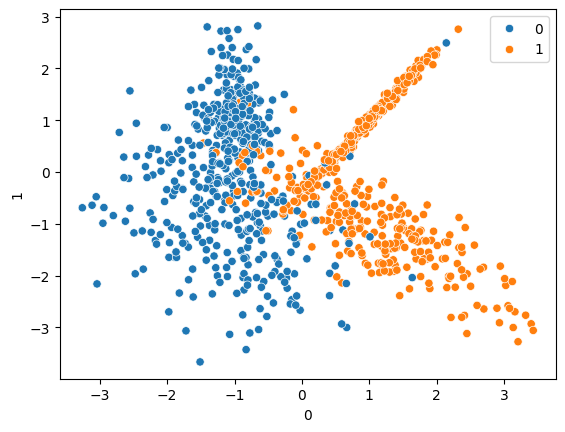

In [50]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=42)

In [52]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()


In [53]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_pred=logistic.predict(x_test)


In [55]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9257142857142857


In [56]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[170  10]
 [ 16 154]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       180
           1       0.94      0.91      0.92       170

    accuracy                           0.93       350
   macro avg       0.93      0.93      0.93       350
weighted avg       0.93      0.93      0.93       350



# **Support Vector Machines**

In [57]:
from sklearn.svm import  SVC
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [58]:
y_pres=svc.predict(x_test)
print(accuracy_score(y_test,y_pres))
print(confusion_matrix(y_test,y_pres))
print(classification_report(y_test,y_pres))

0.9257142857142857
[[170  10]
 [ 16 154]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       180
           1       0.94      0.91      0.92       170

    accuracy                           0.93       350
   macro avg       0.93      0.93      0.93       350
weighted avg       0.93      0.93      0.93       350



In [59]:
rbf=SVC(kernel="rbf")
rbf.fit(x_train,y_train)
y_pred2=rbf.predict(x_test)
print(confusion_matrix(y_pred2,y_test))
print(classification_report(y_pred2,y_test))

[[172  13]
 [  8 157]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       185
           1       0.92      0.95      0.94       165

    accuracy                           0.94       350
   macro avg       0.94      0.94      0.94       350
weighted avg       0.94      0.94      0.94       350



# **Polynomial SVC**

In [62]:
poly=SVC(kernel="poly")
poly.fit(x_train,y_train)
y_pred3=poly.predict(x_test)
print(confusion_matrix(y_pred3,y_test))
print(classification_report(y_pred3,y_test))

[[154   4]
 [ 26 166]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       158
           1       0.98      0.86      0.92       192

    accuracy                           0.91       350
   macro avg       0.92      0.92      0.91       350
weighted avg       0.92      0.91      0.91       350



# **Sigmoid SVC**

In [63]:
sigmoid=SVC(kernel="sigmoid")
sigmoid.fit(x_train,y_train)
y_pred4=sigmoid.predict(x_test)
print(confusion_matrix(y_pred4,y_test))
print(classification_report(y_pred4,y_test))

[[146  24]
 [ 34 146]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       170
           1       0.86      0.81      0.83       180

    accuracy                           0.83       350
   macro avg       0.83      0.83      0.83       350
weighted avg       0.84      0.83      0.83       350



In [64]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [65]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [67]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.946 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.969 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [68]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [69]:
## Prediction
y_pred5=grid.predict(x_test)
print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       180
           1       0.95      0.92      0.94       170

    accuracy                           0.94       350
   macro avg       0.94      0.94      0.94       350
weighted avg       0.94      0.94      0.94       350

[[172   8]
 [ 13 157]]
